In [0]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
cd gdrive/My Drive/AtoZ/Deep_Learning_A_Z/SOM

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

dataset = pd.read_csv('Credit_Card_Applications.csv')
X = dataset.iloc[:,:-1].values
y = dataset.iloc[:,-1].values


from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0,1))
X = sc.fit_transform(X)

#print(X)

In [0]:
from minisom import MiniSom
som = MiniSom(x=10, y=10, input_len=15, sigma=1.0, learning_rate=0.5)
som.random_weights_init(X)
som.train_random(data=X, num_iteration=100)

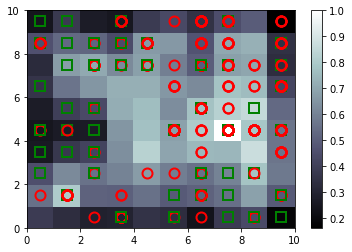

In [53]:
from pylab import bone, pcolor, colorbar, plot, show
bone()
pcolor(som.distance_map().T)
colorbar()
markers = ['o','s']
colors = ['r','g']
for i, x in enumerate(X):
  w = som.winner(x)
  plot(w[0]+0.5,
       w[1]+0.5,
       markers[y[i]],
       markeredgecolor=colors[y[i]],
       markerfacecolor='None',
       markersize=10,
       markeredgewidth=2)
show()

In [0]:
mappings = som.win_map(X)
frauds = np.concatenate((mappings[(1,2)],mappings[(4,4)]),axis=0)
frauds = sc.inverse_transform(frauds)
print(frauds)

[[1.5767264e+07 1.0000000e+00 7.4830000e+01 1.9000000e+01 1.0000000e+00
  1.0000000e+00 1.0000000e+00 4.0000000e-02 0.0000000e+00 1.0000000e+00
  2.0000000e+00 0.0000000e+00 2.0000000e+00 0.0000000e+00 3.5200000e+02]
 [1.5704581e+07 1.0000000e+00 2.3750000e+01 4.1500000e-01 1.0000000e+00
  8.0000000e+00 4.0000000e+00 4.0000000e-02 0.0000000e+00 1.0000000e+00
  2.0000000e+00 0.0000000e+00 2.0000000e+00 1.2800000e+02 7.0000000e+00]
 [1.5761854e+07 1.0000000e+00 3.1250000e+01 2.8350000e+00 2.0000000e+00
  1.0000000e+00 1.0000000e+00 0.0000000e+00 0.0000000e+00 1.0000000e+00
  5.0000000e+00 0.0000000e+00 2.0000000e+00 1.7600000e+02 1.4700000e+02]
 [1.5725776e+07 1.0000000e+00 2.3080000e+01 0.0000000e+00 2.0000000e+00
  4.0000000e+00 4.0000000e+00 1.0000000e+00 0.0000000e+00 1.0000000e+00
  1.1000000e+01 0.0000000e+00 1.0000000e+00 0.0000000e+00 1.0000000e+00]
 [1.5815040e+07 1.0000000e+00 1.9000000e+01 0.0000000e+00 1.0000000e+00
  1.0000000e+00 1.0000000e+00 0.0000000e+00 0.0000000e+00 1.